### <center>  MLDV (CAA1C07)</center>
### <center>  Individual Project</center>

# Prediction on Heart Disease

#### <font color=blue>Name: Julius Chan Jun Qi <font color=black>
#### <font color=blue>Admin No: 2082753A <font color=black>


## Background

This is a multivariate dataset, which indicates that it includes a number of statistical variables, as well as multivariate numerical data analysis. Age, sex, type of chest pain, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise induced angina, oldpeak — ST depression caused by exercise relative to rest, slope of the peak exercise ST segment, number of major vessels, and Thalassemia are among the 14 attributes.

The UCI Machine Learning Repository provided this dataset. About 303 cases from Cleveland have records, and the characteristics are presented in the following section.

## Problem Statement

The problem statement on this dataset is to forecast if a patient has a heart condition or not based on the patient's provided qualities, and another is to diagnose and uncover various insights from this dataset that might aid in better comprehending the situation.

## Data Dictionary

- age - age in years
- sex - (1 = male; 0 = female)
- cp - chest pain type (Value 0 = asymptomatic, Value 1 = atypical angina, Value 2 = non-anginal pain, Value 3 = typical angina)
- trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- chol - serum cholestoral in mg/dl
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg - resting electrocardiographic results
- thalach - maximum heart rate achieved
- exang - exercise induced angina (1 = yes; 0 = no)
- oldpeak - ST depression induced by exercise relative to rest
- slope - the slope of the peak exercise ST segment 
(0 = downsloping, flat = 1 , upsloping = 2)
- ca - number of major vessels (0-3) colored by flourosopy
- thal - (1 = fixed defect 2 = normal 3 = reversable defect)
- target - have disease or not (1 = yes, 0 = no)

## Importing Libraries

In [1]:
#Loading Libraries & importing required packages
import numpy as np
import pandas as pd

#importing packages for plot & charts
import matplotlib.pyplot as plt
import seaborn as sns

#importing packages for model training & testing
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


#importing packages for classifications
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#importing packages for ensemble learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier



#importing packages for model results & analysis
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix




import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [2]:
#Loading Dataset
heartdata = pd.read_csv('heart.csv')

## Data Exploration

In [3]:
print(heartdata.shape)

(303, 14)


In [4]:
#Inspect the first 5 rows of data
heartdata.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#Information on data columns 
heartdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heartdata.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

As we see there are no null values in the dataset, the data can be processed.

In [7]:
# Statistical description of dataframe
heartdata.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Checking if there is any inconsistency or missing data in the dataset.

In [8]:
heartdata.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Data is clean and ready to be processed.

## Data Visualisation

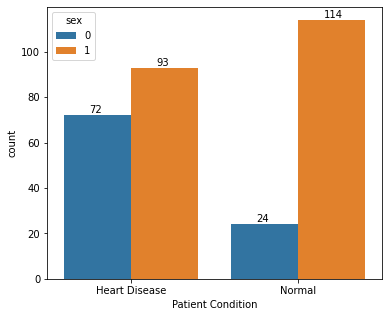

In [9]:
# To see whuch gender are more prone to heart disease 
# 0 = Female, 1 = Male
plt.figure(figsize=(6,5))
ax = sns.countplot(x = heartdata['target'].apply(lambda x:'Heart Disease' if x == 1 else 'Normal'), hue=heartdata['sex'])
ax.set_xlabel('Patient Condition')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    
plt.show()


- 160 patients has heart diseases & 136 patients are heart disease free.
- As seen in the countplot, males tend to be prone to heart disease compared to females. 
- The number of women with heart disease surpasses the number of women without heart disease so this may not be solid evidence.

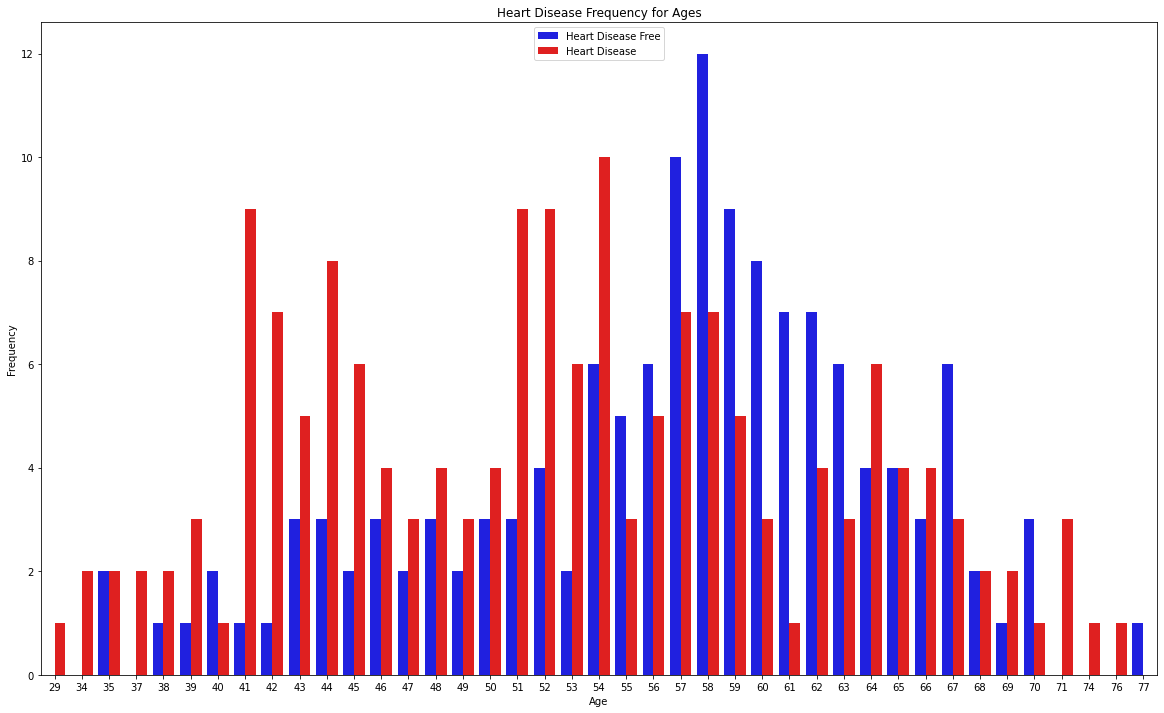

In [10]:
# To see which age range are at higher risk of heart disease
plt.figure(figsize=(20, 12))
sns.countplot(x='age', hue='target', data=heartdata, palette=['blue', 'red'])
plt.legend(["Heart Disease Free", "Heart Disease"])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

- The countplot shows the frequency of heart disease in persons of various ages. People withtin the age range of 41 to 60 are more prone to heart disease.

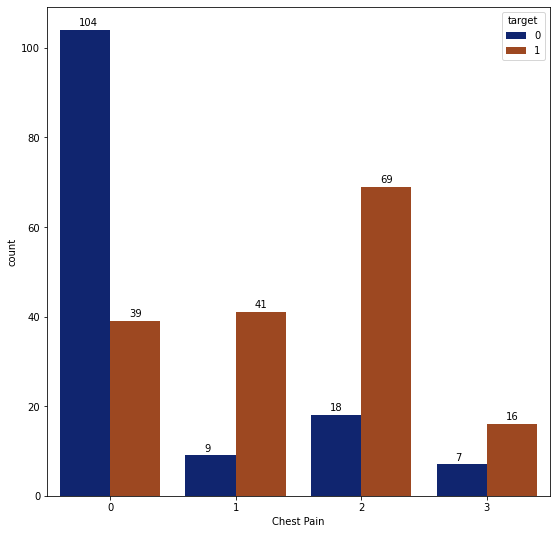

In [11]:
# To see if chest pain indicates possible heart disease
# (Value 0 = asymptomatic, Value 1 = atypical angina, Value 2 = non-anginal pain, Value 3 = typical angina)
# (Target 0 = No Heart Disease Target 1 = With Heart Disease)
plt.figure(figsize = (9,9))

ax = sns.countplot(x = heartdata['cp'], hue = heartdata['target'], palette = 'dark')
ax.set_xlabel('Chest Pain')
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+1))
    
plt.show()


- 0 (asymptomatic) indicates that there is a low chance of a heart disease.
- 1 (atypical angina) indicates a higher risk of heart disease
- 2 (non-anginal pain) indicates a higher risk of heart disease
- 3 (typical angina) denotes a higher or lower likelihood of a heart disease

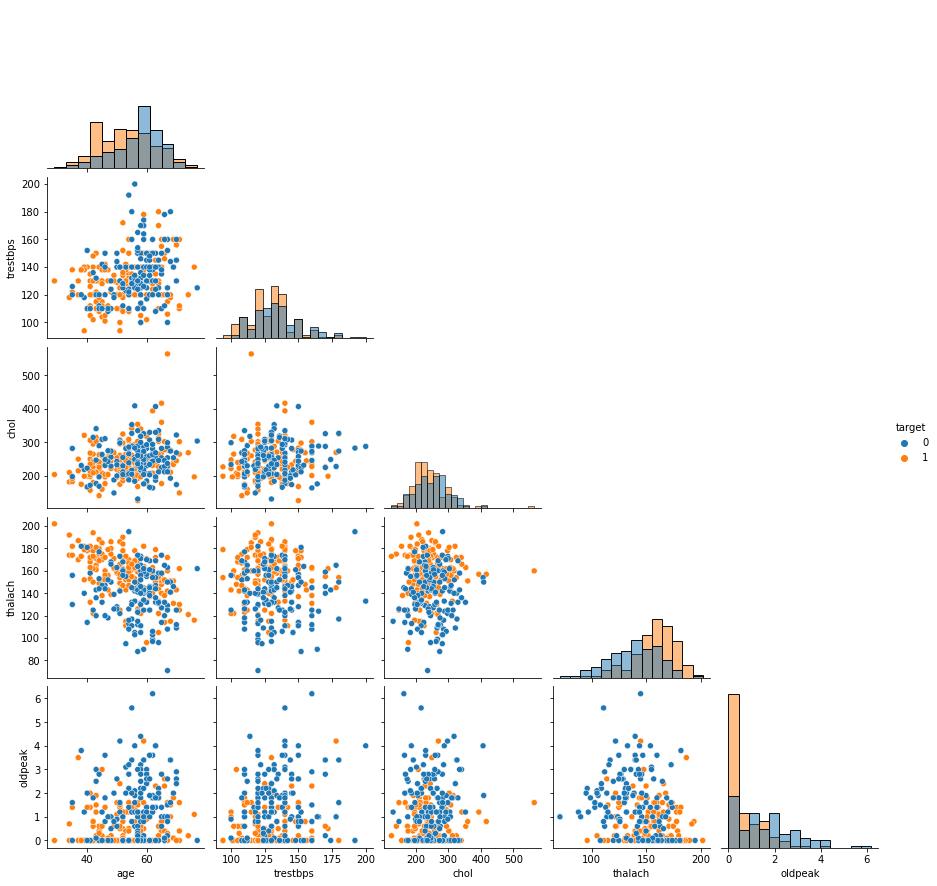

In [28]:
# To see the Distributions and Relations
# This is done to see the relation between heart disease and the provided qualities
columns=['age','trestbps','chol','thalach','oldpeak','target'] # Selected columns
sns.pairplot(heartdata[columns],hue='target',corner=True,diag_kind='hist')

<AxesSubplot:>

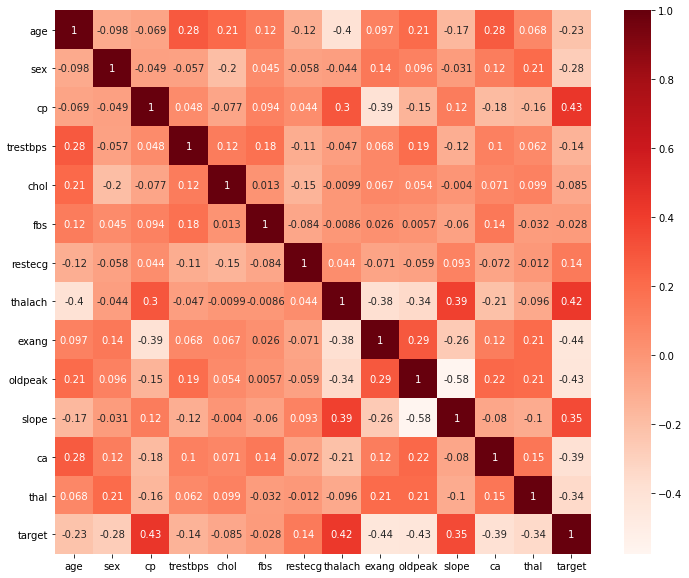

In [29]:
#To see which attribute are relatad to 'Target'
plt.figure(figsize=(12,10))
sns.heatmap(heartdata.corr(),cmap='Reds',annot=True)

Based on the the correlation map, these attributes are has a positive & negative correlation with 'target' and it might have a reason so :

- thalach & target. This might imply that if the maximum heartrate increases, the possiblity of heart disease increases. (Positve Correlation)
- exang & target. If a patient does not exercise because of angina, the risk of heart disease rises. (Negative Correlation)
- cp & target. This makes sense since the more chest discomfort you have, the more likely you are to develop heart disease. (Positive Correlation)

#### One Hot Encoding

In [30]:
#One Hot encoding is applied to categorical columns to reduce bias
#Columns such as sex, fbs and exang are excluded as it contains only two unique values.
heartdata = pd.get_dummies(heartdata,columns =['cp','restecg','slope','ca','thal'])

In [31]:
#To inspect changes to the dataframe
heartdata.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,1,0,...,0,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,1,...,1,1,0,0,0,0,0,0,1,0


#### Standard Scaler

In [32]:
#standard scaler adjusts the columns from -1 to 1 depending on their mean and standard deviation values.
standardScaler = StandardScaler()

In [33]:
#standard scaler is applied to the numeric attributes
numeric_cols=['age','trestbps','chol','thalach','oldpeak']
heartdata[numeric_cols] = standardScaler.fit_transform(heartdata[numeric_cols])


In [34]:
# To inspect changes made to the dataframe
heartdata.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,1,0.763956,-0.256334,1,0.015443,0,1.087338,1,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,1,-0.092738,0.072199,0,1.633471,0,2.122573,1,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,0,-0.092738,-0.816773,0,0.977514,0,0.310912,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,1,-0.663867,-0.198357,0,1.239897,0,-0.206705,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,0,-0.663867,2.082050,0,0.583939,1,-0.379244,1,1,...,1,1,0,0,0,0,0,0,1,0


## Feature Selection 

To increase the model's performance by selecting the important features. Selection of features from the model strategy is required. ExtraTreesClassifier will be used as the model to select all the important features.

In [35]:
# features are divided to "x" and labels to "y".
y=heartdata['target']
y=np.array(y)
x=heartdata.drop(columns=['target']) # removed the label column from dataframe and passed it to x

In [36]:
clf = ExtraTreesClassifier(n_estimators=500).fit(x, y)
selector = SelectFromModel(clf, prefit=True)
x_columns=x.columns 
columns=selector.get_support()
selected_columns=list([x_columns[i] for i in range(len(columns)) if columns[i]])  #creating list of the selected columns
print(selected_columns)

['age', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'cp_0', 'slope_2', 'ca_0', 'thal_2', 'thal_3']


[0.05144609 0.03384357 0.04613928 0.04633574 0.01437043 0.05986657
 0.07060462 0.05788511 0.08647647 0.01480287 0.03410802 0.01457401
 0.0230846  0.02209472 0.00147815 0.00655759 0.03354131 0.04354574
 0.10316694 0.02499428 0.01577214 0.01320328 0.00314484 0.00126459
 0.0057262  0.09103755 0.08093529]


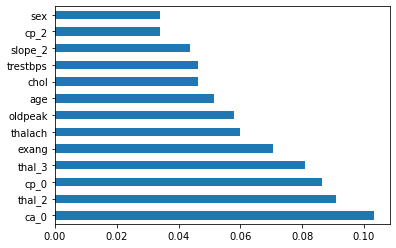

In [37]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

In [38]:
#Selecting the important features
x_features = selector.transform(x)

## Model Training & Evaluation

Classification models are used to train & make predictions for Evaluation

In [39]:
X = x_features # Features
y = heartdata.target # Target variable

#Split into 70% Training Set & 30% Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## Make Predictions

### Logistic Regression Classification Report

In [41]:
lr_clf = LogisticRegression(solver = 'liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)



Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.887640    0.853659  0.867925    0.870649      0.869207
recall      0.814433    0.913043  0.867925    0.863738      0.867925
f1-score    0.849462    0.882353  0.867925    0.865908      0.867304
support    97.000000  115.000000  0.867925  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 79  18]
 [ 10 105]]

Test Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.850000   0.862745  0.857143   0.856373      0.857003
recall      0.829268   0.880000  0.857143   0.854634      0.857143
f1-score    0.839506   0.871287  0.857143   0.855397      0.856968
support    41.000000  50.000000  0.857143  91.000000     91.000000
_____________

<Figure size 432x432 with 0 Axes>

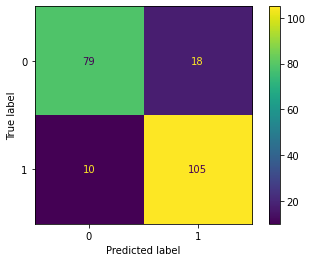

In [42]:
plt.figure(figsize=(6, 6))
plot_confusion_matrix(lr_clf, X_train, y_train)  
plt.show()

<Figure size 432x432 with 0 Axes>

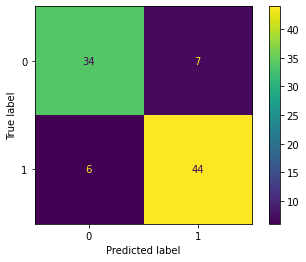

In [43]:
plt.figure(figsize=(6, 6))
plot_confusion_matrix(lr_clf, X_test, y_test)  
plt.show()

In [44]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.792453,85.714286


### Linear Discriminant Analysis Classification Report

In [45]:
lda_clf = LinearDiscriminantAnalysis()
lda_clf.fit(X_train, y_train)

print_score(lda_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lda_clf, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 86.79%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.879121    0.859504  0.867925    0.869313      0.868480
recall      0.824742    0.904348  0.867925    0.864545      0.867925
f1-score    0.851064    0.881356  0.867925    0.866210      0.867496
support    97.000000  115.000000  0.867925  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Accuracy Score: 83.52%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.825000   0.843137  0.835165   0.834069      0.834966
recall      0.804878   0.860000  0.835165   0.832439      0.835165
f1-score    0.814815   0.851485  0.835165   0.833150      0.834963
support    41.000000  50.000000  0.835165  91.000000     91.000000
_____________

<Figure size 432x432 with 0 Axes>

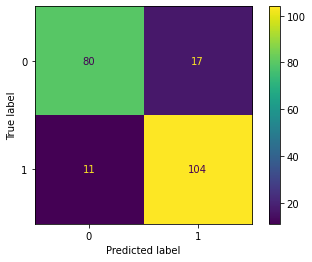

In [46]:
plt.figure(figsize=(6, 6))
plot_confusion_matrix(lda_clf, X_train, y_train)  
plt.show()

<Figure size 432x432 with 0 Axes>

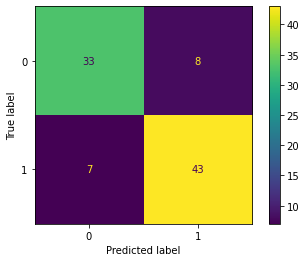

In [47]:
plt.figure(figsize=(6, 6))
plot_confusion_matrix(lda_clf, X_test, y_test)  
plt.show()

In [48]:
test_score = accuracy_score(y_test, lda_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lda_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Linear Discriminant Analysis", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.792453,85.714286
1,Linear Discriminant Analysis,86.792453,83.516484


### KNeighbors Classification Report

In [49]:
knn_clf = KNeighborsClassifier(n_jobs=-1, p=1)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.26%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.864583    0.879310  0.872642    0.871947      0.872572
recall      0.855670    0.886957  0.872642    0.871313      0.872642
f1-score    0.860104    0.883117  0.872642    0.871610      0.872587
support    97.000000  115.000000  0.872642  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 83  14]
 [ 13 102]]

Test Result:
Accuracy Score: 81.32%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.815789   0.811321  0.813187   0.813555      0.813334
recall      0.756098   0.860000  0.813187   0.808049      0.813187
f1-score    0.784810   0.834951  0.813187   0.809881      0.812360
support    41.000000  50.000000  0.813187  91.000000     91.000000
_____________

<Figure size 432x432 with 0 Axes>

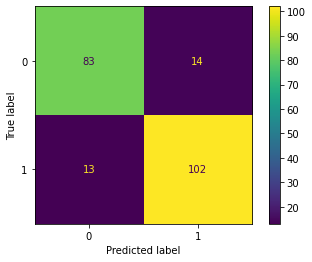

In [50]:
plt.figure(figsize=(6, 6))
plot_confusion_matrix(knn_clf, X_train, y_train) 

plt.show()

<Figure size 432x432 with 0 Axes>

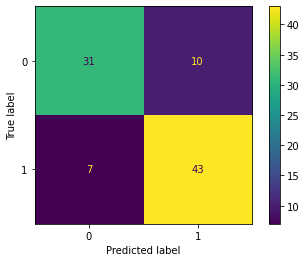

In [51]:
plt.figure(figsize=(6, 6))
plot_confusion_matrix(knn_clf, X_test, y_test) 

plt.show()

In [52]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["KNeighbour", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.792453,85.714286
1,Linear Discriminant Analysis,86.792453,83.516484
2,KNeighbour,87.264151,81.318681


### Decision Tree Classificaiton Report

In [53]:
cart_clf = DecisionTreeClassifier(random_state=120, min_impurity_decrease=0.01)
cart_clf.fit(X_train, y_train)

print_score(cart_clf, X_train, y_train, X_test, y_test, train=True)
print_score(cart_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.15%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.862745    0.918182  0.891509    0.890463      0.892817
recall      0.907216    0.878261  0.891509    0.892739      0.891509
f1-score    0.884422    0.897778  0.891509    0.891100      0.891667
support    97.000000  115.000000  0.891509  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 88   9]
 [ 14 101]]

Test Result:
Accuracy Score: 76.92%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.700000   0.853659  0.769231   0.776829      0.784428
recall      0.853659   0.700000  0.769231   0.776829      0.769231
f1-score    0.769231   0.769231  0.769231   0.769231      0.769231
support    41.000000  50.000000  0.769231  91.000000     91.000000
_____________

<Figure size 432x432 with 0 Axes>

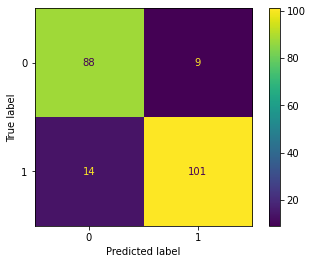

In [54]:
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cart_clf, X_train, y_train)  
plt.show()

<Figure size 432x432 with 0 Axes>

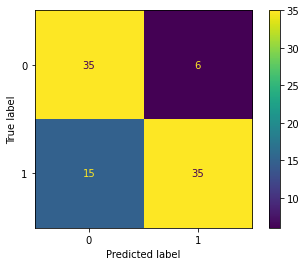

In [55]:
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cart_clf, X_test, y_test)  
plt.show()

In [56]:
test_score = accuracy_score(y_test, cart_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, cart_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.792453,85.714286
1,Linear Discriminant Analysis,86.792453,83.516484
2,KNeighbour,87.264151,81.318681
3,Decision Tree,89.150943,76.923077


### Support Vector Machine Classification Report

In [57]:
svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.15%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.902174    0.883333  0.891509    0.892754      0.891954
recall      0.855670    0.921739  0.891509    0.888705      0.891509
f1-score    0.878307    0.902128  0.891509    0.890217      0.891229
support    97.000000  115.000000  0.891509  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 83  14]
 [  9 106]]

Test Result:
Accuracy Score: 83.52%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.809524   0.857143  0.835165   0.833333      0.835688
recall      0.829268   0.840000  0.835165   0.834634      0.835165
f1-score    0.819277   0.848485  0.835165   0.833881      0.835325
support    41.000000  50.000000  0.835165  91.000000     91.000000
_____________

<Figure size 432x432 with 0 Axes>

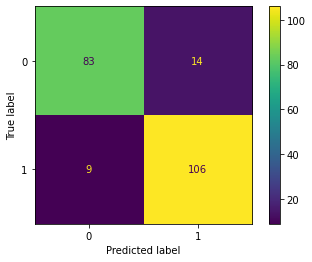

In [58]:
plt.figure(figsize=(6, 6))
plot_confusion_matrix(svm_clf, X_train, y_train)  
plt.show()

<Figure size 432x432 with 0 Axes>

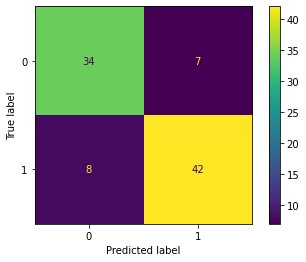

In [59]:
plt.figure(figsize=(6, 6))
plot_confusion_matrix(svm_clf, X_test, y_test)  
plt.show()

In [60]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.792453,85.714286
1,Linear Discriminant Analysis,86.792453,83.516484
2,KNeighbour,87.264151,81.318681
3,Decision Tree,89.150943,76.923077
4,Support Vector Machine,89.150943,83.516484


## Ensemble Learning

### Random Forest Classifier Report

In [61]:
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 79.12%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.750000   0.829787  0.791209   0.789894      0.793839
recall      0.804878   0.780000  0.791209   0.792439      0.791209
f1-score    0.776471   0.804124  0.791209   0.790297      0.791665
support    41.000000  50.000000  0.791209  91.000000     91.000000
_______________________________________________
Confusion Matrix: 


<Figure size 432x432 with 0 Axes>

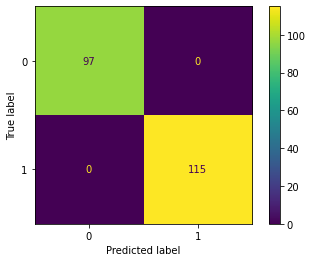

In [62]:
plt.figure(figsize=(6, 6))
plot_confusion_matrix(rf_clf, X_train, y_train)  
plt.show()

<Figure size 432x432 with 0 Axes>

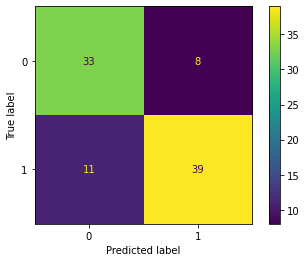

In [63]:
plt.figure(figsize=(6, 6))
plot_confusion_matrix(rf_clf, X_test, y_test)  
plt.show()

In [64]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.792453,85.714286
1,Linear Discriminant Analysis,86.792453,83.516484
2,KNeighbour,87.264151,81.318681
3,Decision Tree,89.150943,76.923077
4,Support Vector Machine,89.150943,83.516484
5,Random Forest Classifier,100.000000,79.120879


### Gradient Boosting Classifier Report

In [65]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gb_clf.fit(X_train, y_train)
print_score(gb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.17%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.969072    0.973913  0.971698    0.971493      0.971698
recall      0.969072    0.973913  0.971698    0.971493      0.971698
f1-score    0.969072    0.973913  0.971698    0.971493      0.971698
support    97.000000  115.000000  0.971698  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 94   3]
 [  3 112]]

Test Result:
Accuracy Score: 75.82%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.693878   0.833333  0.758242   0.763605      0.770502
recall      0.829268   0.700000  0.758242   0.764634      0.758242
f1-score    0.755556   0.760870  0.758242   0.758213      0.758475
support    41.000000  50.000000  0.758242  91.000000     91.000000
_____________

<Figure size 432x432 with 0 Axes>

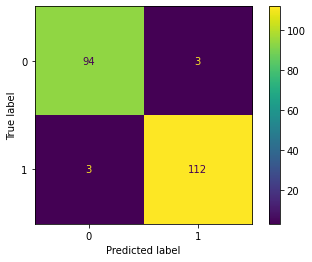

In [66]:
plt.figure(figsize=(6, 6))
plot_confusion_matrix(gb_clf, X_train, y_train)  
plt.show()

<Figure size 432x432 with 0 Axes>

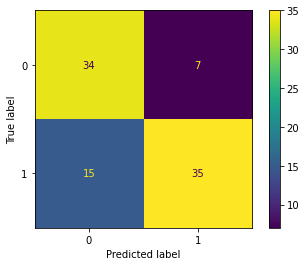

In [67]:
plt.figure(figsize=(6, 6))
plot_confusion_matrix(gb_clf, X_test, y_test)  
plt.show()

In [68]:
test_score = accuracy_score(y_test, gb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, gb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Gradient Boosting Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.792453,85.714286
1,Linear Discriminant Analysis,86.792453,83.516484
2,KNeighbour,87.264151,81.318681
3,Decision Tree,89.150943,76.923077
4,Support Vector Machine,89.150943,83.516484
5,Random Forest Classifier,100.000000,79.120879
6,Gradient Boosting Classifier,97.169811,75.824176


### Adaptive Boosting Classifier Report

In [69]:
ada_clf= AdaBoostClassifier()
ada_clf.fit(X_train, y_train)
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.92%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.927083    0.931034  0.929245    0.929059      0.929227
recall      0.917526    0.939130  0.929245    0.928328      0.929245
f1-score    0.922280    0.935065  0.929245    0.928672      0.929215
support    97.000000  115.000000  0.929245  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 89   8]
 [  7 108]]

Test Result:
Accuracy Score: 76.92%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.717391   0.822222  0.769231   0.769807      0.774991
recall      0.804878   0.740000  0.769231   0.772439      0.769231
f1-score    0.758621   0.778947  0.769231   0.768784      0.769789
support    41.000000  50.000000  0.769231  91.000000     91.000000
_____________

<Figure size 432x432 with 0 Axes>

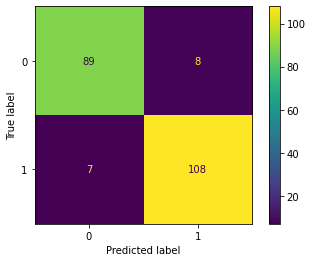

In [70]:
plt.figure(figsize=(6, 6))
plot_confusion_matrix(ada_clf, X_train, y_train)  
plt.show()

<Figure size 432x432 with 0 Axes>

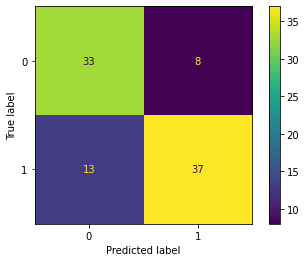

In [71]:
plt.figure(figsize=(6, 6))
plot_confusion_matrix(ada_clf, X_test, y_test)  
plt.show()

In [72]:
test_score = accuracy_score(y_test, ada_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, ada_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Adaptive Boosting Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.792453,85.714286
1,Linear Discriminant Analysis,86.792453,83.516484
2,KNeighbour,87.264151,81.318681
3,Decision Tree,89.150943,76.923077
4,Support Vector Machine,89.150943,83.516484
5,Random Forest Classifier,100.000000,79.120879
6,Gradient Boosting Classifier,97.169811,75.824176
7,Adaptive Boosting Classifier,92.924528,76.923077


### Extra Trees Classifier Report

In [73]:
etc_clf = ExtraTreesClassifier()
etc_clf.fit(X_train, y_train)
print_score(etc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(etc_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    97.0  115.0       1.0      212.0         212.0
_______________________________________________
Confusion Matrix: 
 [[ 97   0]
 [  0 115]]

Test Result:
Accuracy Score: 76.92%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.727273   0.808511  0.769231   0.767892      0.771909
recall      0.780488   0.760000  0.769231   0.770244      0.769231
f1-score    0.752941   0.783505  0.769231   0.768223      0.769735
support    41.000000  50.000000  0.769231  91.000000     91.000000
_______________________________________________
Confusion Matrix: 


<Figure size 432x432 with 0 Axes>

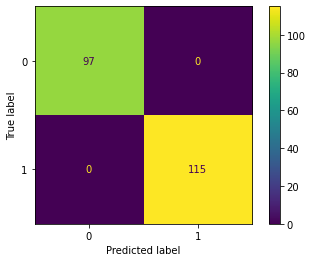

In [74]:
plt.figure(figsize=(6, 6))
plot_confusion_matrix(etc_clf, X_train, y_train)  
plt.show()

<Figure size 432x432 with 0 Axes>

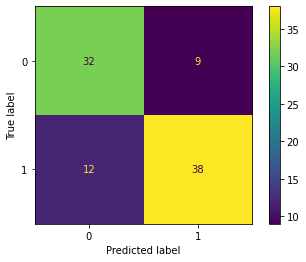

In [75]:
plt.figure(figsize=(6, 6))
plot_confusion_matrix(etc_clf, X_test, y_test)  
plt.show()

In [76]:
test_score = accuracy_score(y_test, etc_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, etc_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Extra Trees Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.792453,85.714286
1,Linear Discriminant Analysis,86.792453,83.516484
2,KNeighbour,87.264151,81.318681
3,Decision Tree,89.150943,76.923077
4,Support Vector Machine,89.150943,83.516484
5,Random Forest Classifier,100.000000,79.120879
6,Gradient Boosting Classifier,97.169811,75.824176
7,Adaptive Boosting Classifier,92.924528,76.923077
8,Extra Trees Classifier,100.000000,76.923077


### Bagging Classifier Report

In [77]:
bag_clf= BaggingClassifier()
bag_clf.fit(X_train, y_train)
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.58%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.989583    0.982759  0.985849    0.986171      0.985881
recall      0.979381    0.991304  0.985849    0.985343      0.985849
f1-score    0.984456    0.987013  0.985849    0.985734      0.985843
support    97.000000  115.000000  0.985849  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 95   2]
 [  1 114]]

Test Result:
Accuracy Score: 75.82%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.693878   0.833333  0.758242   0.763605      0.770502
recall      0.829268   0.700000  0.758242   0.764634      0.758242
f1-score    0.755556   0.760870  0.758242   0.758213      0.758475
support    41.000000  50.000000  0.758242  91.000000     91.000000
_____________

<Figure size 432x432 with 0 Axes>

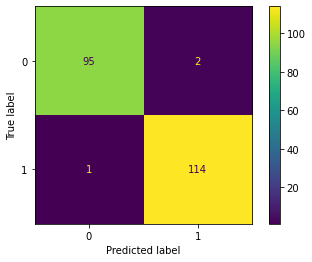

In [78]:
plt.figure(figsize=(6, 6))
plot_confusion_matrix(bag_clf, X_train, y_train)  
plt.show()

<Figure size 432x432 with 0 Axes>

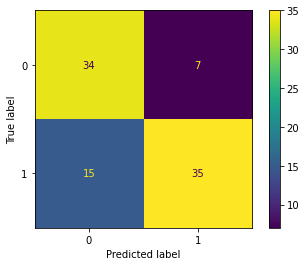

In [79]:
plt.figure(figsize=(6, 6))
plot_confusion_matrix(bag_clf, X_test, y_test)  
plt.show()

In [80]:
test_score = accuracy_score(y_test, bag_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, bag_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Bagging Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,86.792453,85.714286
1,Linear Discriminant Analysis,86.792453,83.516484
2,KNeighbour,87.264151,81.318681
3,Decision Tree,89.150943,76.923077
4,Support Vector Machine,89.150943,83.516484
5,Random Forest Classifier,100.000000,79.120879
6,Gradient Boosting Classifier,97.169811,75.824176
7,Adaptive Boosting Classifier,92.924528,76.923077
8,Extra Trees Classifier,100.000000,76.923077
9,Bagging Classifier,98.584906,75.824176


### Hyperparemeter tuning

Logistic Regression performed the best out of all during classification model evaluaton.

Random Forest Classification performed the best out of all during ensemble learning evaluation.

Hyperparemeter tuning from GridSearch will be used on both base models to see if there is improvements.

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
params = {
        "C": np.logspace(-4, 4, 20), # For Regularization
          "solver": ["liblinear"]}

lr = LogisticRegression()

lr_clf = GridSearchCV(lr, params, scoring = "accuracy", n_jobs = -1, verbose = 1, cv = 5)

In [83]:
lr_clf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [84]:
best_params = lr_clf.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'C': 11.288378916846883, 'solver': 'liblinear'}


In [85]:
lr = LogisticRegression(**best_params)

lr.fit(X_train, y_train)

print_score(lr, X_train, y_train, X_test, y_test, True)
print_score(lr, X_train, y_train, X_test, y_test, False)

Train Result:
Accuracy Score: 87.26%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.880435    0.866667  0.872642    0.873551      0.872966
recall      0.835052    0.904348  0.872642    0.869700      0.872642
f1-score    0.857143    0.885106  0.872642    0.871125      0.872312
support    97.000000  115.000000  0.872642  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 81  16]
 [ 11 104]]

Test Result:
Accuracy Score: 83.52%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.809524   0.857143  0.835165   0.833333      0.835688
recall      0.829268   0.840000  0.835165   0.834634      0.835165
f1-score    0.819277   0.848485  0.835165   0.833881      0.835325
support    41.000000  50.000000  0.835165  91.000000     91.000000
_____________

<Figure size 432x432 with 0 Axes>

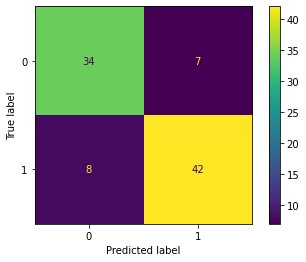

In [86]:
lr = LogisticRegression(**best_params)
plt.figure(figsize=(6, 6))
plot_confusion_matrix(lr_clf, X_test, y_test)  
plt.show()

The Logistic Regression model accuracy did not improve via gridsearch.

In [87]:
# Number of trees in random forest
n_estimators = [500, 900, 1100, 1500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2, 4, 7, 10, 15, None]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [88]:
params_grid = {   
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [89]:
rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed:  2.8min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 7, 10, 15, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [500, 900, 1100, 1500]},
             scoring='accuracy', verbose=1)

In [90]:
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}


In [91]:
rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.04%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.923913    0.900000  0.910377    0.911957      0.910941
recall      0.876289    0.939130  0.910377    0.907710      0.910377
f1-score    0.899471    0.919149  0.910377    0.909310      0.910145
support    97.000000  115.000000  0.910377  212.000000    212.000000
_______________________________________________
Confusion Matrix: 
 [[ 85  12]
 [  7 108]]

Test Result:
Accuracy Score: 81.32%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.785714   0.836735  0.813187   0.811224      0.813747
recall      0.804878   0.820000  0.813187   0.812439      0.813187
f1-score    0.795181   0.828283  0.813187   0.811732      0.813369
support    41.000000  50.000000  0.813187  91.000000     91.000000
_____________

<Figure size 432x432 with 0 Axes>

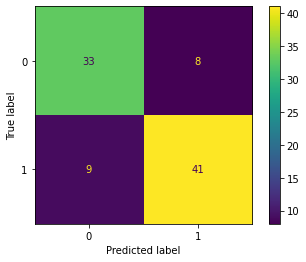

In [92]:
rf = RandomForestClassifier(**best_params)
plt.figure(figsize=(6, 6))
plot_confusion_matrix(rf_clf, X_test, y_test)  
plt.show()

The Random Forest Classfier model test accuracy had a small improvement on test accuracy.